In [2]:
print('avijit')

avijit


In [3]:
print("avijit biwas")

avijit biwas


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline

In [11]:
!pip install mlxtend

In [12]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
  Using cached mlxtend-0.23.1-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.1-py3-none-any.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
from mlxtend.frequent_patterns import apriori, association_rules

In [14]:
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)

In [21]:
encoding_list = ['ascii', 'big5', 'big5hkscs', 'cp037', 'cp273', 'cp424', 'cp437', 'cp500', 'cp720', 'cp737'
                 , 'cp775', 'cp850', 'cp852', 'cp855', 'cp856', 'cp857', 'cp858', 'cp860', 'cp861', 'cp862'
                 , 'cp863', 'cp864', 'cp865', 'cp866', 'cp869', 'cp874', 'cp875', 'cp932', 'cp949', 'cp950'
                 , 'cp1006', 'cp1026', 'cp1125', 'cp1140', 'cp1250', 'cp1251', 'cp1252', 'cp1253', 'cp1254'
                 , 'cp1255', 'cp1256', 'cp1257', 'cp1258', 'euc_jp', 'euc_jis_2004', 'euc_jisx0213', 'euc_kr'
                 , 'gb2312', 'gbk', 'gb18030', 'hz', 'iso2022_jp', 'iso2022_jp_1', 'iso2022_jp_2'
                 , 'iso2022_jp_2004', 'iso2022_jp_3', 'iso2022_jp_ext', 'iso2022_kr', 'latin_1', 'iso8859_2'
                 , 'iso8859_3', 'iso8859_4', 'iso8859_5', 'iso8859_6', 'iso8859_7', 'iso8859_8', 'iso8859_9'
                 , 'iso8859_10', 'iso8859_11', 'iso8859_13', 'iso8859_14', 'iso8859_15', 'iso8859_16', 'johab'
                 , 'koi8_r', 'koi8_t', 'koi8_u', 'kz1048', 'mac_cyrillic', 'mac_greek', 'mac_iceland', 'mac_latin2'
                 , 'mac_roman', 'mac_turkish', 'ptcp154', 'shift_jis', 'shift_jis_2004', 'shift_jisx0213', 'utf_32'
                 , 'utf_32_be', 'utf_32_le', 'utf_16', 'utf_16_be', 'utf_16_le', 'utf_7', 'utf_8', 'utf_8_sig']

In [22]:
path="D:\Pyn\online learning\INURAN_DATA\FSDS_September\TEST_WORK\msdasm work\Data Mining\Groceries_dataset.xlsx"

In [23]:
for encoding in encoding_list:
    worked = True
    try:
        df = pd.read_csv(path, encoding=encoding, nrows=5)
    except:
        worked = False
    if worked:
        print(encoding, ':\n', df.head())

In [24]:
df

NameError: name 'df' is not defined

In [27]:
df = pd.read_excel(path)

In [28]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,2015-05-01 00:00:00,whole milk
2,2300,19-09-2015,pip fruit
3,1187,2015-12-12 00:00:00,other vegetables
4,3037,2015-01-02 00:00:00,whole milk


In [29]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [31]:
df.Member_number.nunique()

3898

In [32]:
df.Date.nunique()

728

In [33]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [34]:
df["itemDescription"].value_counts().head(10)

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

In [43]:
basket=df.groupby(["Member_number","itemDescription"])["Date"].count().unstack().reset_index().fillna(0).set_index("Member_number")

In [44]:
basket.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [45]:
def encode_units(x):
    if x<1:
        return 0
    if x>=1:
        return 1

In [47]:
basket=basket.applymap(encode_units)
basket.head(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
basket_milk_df=basket.loc[basket["whole milk"]==1]
basket_milk_df

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [50]:
whole_milk_df=basket.loc[basket["whole milk"]==1]
whole_milk_df

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [52]:
frequent_itemsets=apriori(whole_milk_df,min_support=0.15,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.186450,(bottled beer)
1,0.245241,(bottled water)
2,0.152296,(brown bread)
3,0.190370,(canned beer)
4,0.201568,(citrus fruit)
5,0.153415,(domestic eggs)
6,0.157895,(newspapers)
7,0.417693,(other vegetables)
8,0.198768,(pastry)
9,0.189810,(pip fruit)


In [59]:
whole_milk_rule=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
whole_milk_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(bottled beer),1.000000,0.186450,0.186450,0.186450,1.000000,0.000000,1.000000,0.000000
1,(bottled beer),(whole milk),0.186450,1.000000,0.186450,1.000000,1.000000,0.000000,inf,0.000000
2,(whole milk),(bottled water),1.000000,0.245241,0.245241,0.245241,1.000000,0.000000,1.000000,0.000000
3,(bottled water),(whole milk),0.245241,1.000000,0.245241,1.000000,1.000000,0.000000,inf,0.000000
4,(whole milk),(brown bread),1.000000,0.152296,0.152296,0.152296,1.000000,0.000000,1.000000,0.000000
5,(brown bread),(whole milk),0.152296,1.000000,0.152296,1.000000,1.000000,0.000000,inf,0.000000
6,(whole milk),(canned beer),1.000000,0.190370,0.190370,0.190370,1.000000,0.000000,1.000000,0.000000
7,(canned beer),(whole milk),0.190370,1.000000,0.190370,1.000000,1.000000,0.000000,inf,0.000000
8,(citrus fruit),(whole milk),0.201568,1.000000,0.201568,1.000000,1.000000,0.000000,inf,0.000000
9,(whole milk),(citrus fruit),1.000000,0.201568,0.201568,0.201568,1.000000,0.000000,1.000000,0.000000


In [60]:
whole_milk_df.sort_values(["lift","support"],ascending=False).rest_index(drop=True)

KeyError: 'lift'

In [62]:
whole_milk_rule.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
1,"(whole milk, yogurt)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
2,(yogurt),"(whole milk, other vegetables)",0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
3,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
4,"(whole milk, other vegetables)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
5,(other vegetables),"(whole milk, yogurt)",0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
6,(rolls/buns),(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,0.016397,1.077887,0.149954
7,(other vegetables),(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,0.016397,1.068745,0.157163
8,"(whole milk, rolls/buns)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,0.016397,1.077887,0.149954
9,"(whole milk, other vegetables)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,0.016397,1.068745,0.157163


In [ ]:
def fbt(item):
    item_df=basket.loc[basket[item]==1]
    frequent_itemsets=apriori(item_df,min_support=0.15,use_colnames=True)
    rules=association_rules(frequent_itemsets,metric='lift', min_threshold=1)


In [63]:
def frequently_bought_together(item):

    # df of item passed
    item_df = basket.loc[basket[item]==1]

    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)

    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sorting on lift and support
    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

    print('Items frequently bought together with {0}'.format(item))

    # Returning top 6 items with highest lift and support
    return rules['consequents'].unique()[:6]

In [64]:
frequently_bought_together('salty snack')

Items frequently bought together with salty snack


array([frozenset({'bottled beer'}), frozenset({'salty snack'}),
       frozenset({'bottled water'}), frozenset({'brown bread'}),
       frozenset({'butter'}), frozenset({'canned beer'})], dtype=object)

In [65]:
frequently_bought_together('ice cream')

Items frequently bought together with ice cream


array([frozenset({'beef'}), frozenset({'ice cream'}),
       frozenset({'bottled beer'}), frozenset({'bottled water'}),
       frozenset({'butter'}), frozenset({'canned beer'})], dtype=object)

In [66]:
frequently_bought_together('chewing gum')

Items frequently bought together with chewing gum


array([frozenset({'beef'}), frozenset({'chewing gum'}),
       frozenset({'bottled beer'}), frozenset({'bottled water'}),
       frozenset({'whole milk'}), frozenset({'butter'})], dtype=object)

In [68]:
support = whole_milk_rule.support.values
confidence = whole_milk_rule.confidence.values

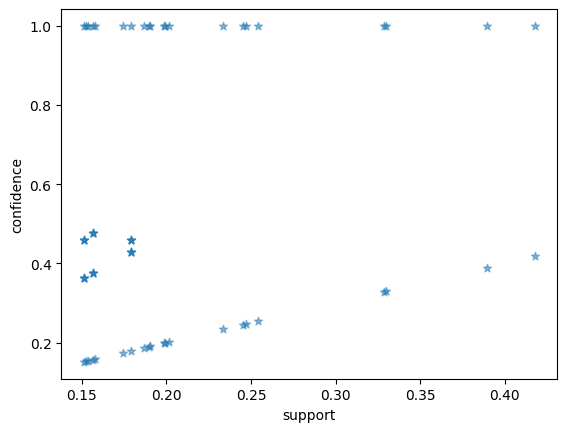

In [69]:
import matplotlib.pyplot as plt

# Creating a scatter plot of support v confidence
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [70]:
import networkx as nx

In [71]:
def visualize_rules(item, no_of_rules, basket):
    # df of item passed
    item_df = basket.loc[basket[item] == 1]

    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)

    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sorting on lift and support
    rules = rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)

    print('Items frequently bought together with {0}'.format(item))

    # Returning top 6 items with highest lift and support
    print(rules['consequents'].head(6).tolist())

    support = rules.support.values
    confidence = rules.confidence.values


    # Creating scatter plot of support vs confidence
    plt.scatter(support, confidence, alpha=0.5, marker="*")
    plt.title('Support vs Confidence graph')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.show()

    # Creating a new digraph
    G1 = nx.DiGraph()

    color_map = []
    N = 50
    cmap = plt.get_cmap("viridis", no_of_rules)  # Choose a colormap
    colors = [cmap(i) for i in range(no_of_rules)]

    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    # adding as many nodes as the number of rules requested by the user
    for i in range(no_of_rules):
        G1.add_node("R"+str(i))

        # adding antecedents to the nodes
        for a in rules.iloc[i]['antecedents']:
            G1.add_node(a)
            G1.add_edge(a, "R"+str(i), weight=2)

        # adding consequents to the nodes
        for c in rules.iloc[i]['consequents']:
            G1.add_node(c)
            G1.add_edge("R"+str(i), c, weight=2)

    for node in G1.nodes():
        if node in strs:
            color_map.append('yellow')
        else:
            color_map.append('green')

    print('Visualization of Rules')

    weights = [G1[u][v]['weight'] for u, v in G1.edges()]

    pos = nx.spring_layout(G1, k=16, scale=1)

    # Use a colormap for edge colors based on weight
    edge_colors = weights

    nx.draw(G1, pos, node_color=color_map, edge_color=edge_colors, cmap=plt.cm.viridis,
            width=weights, font_size=16, with_labels=False, edge_cmap=plt.cm.Blues)

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

Items frequently bought together with ice cream
[frozenset({'rolls/buns'}), frozenset({'rolls/buns'}), frozenset({'rolls/buns', 'ice cream'}), frozenset({'sausage'}), frozenset({'sausage'}), frozenset({'sausage', 'ice cream'})]


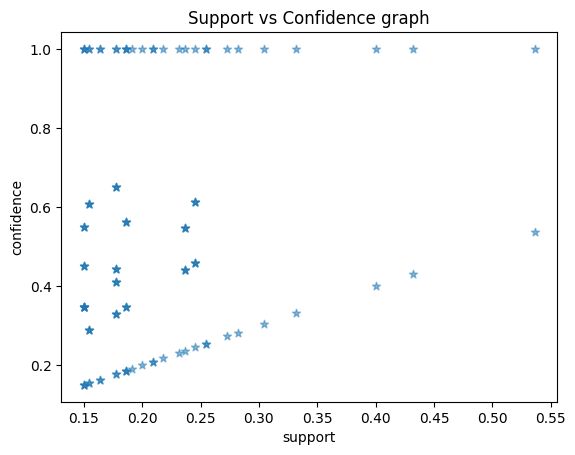

Visualization of Rules


C:\Users\aviji\AppData\Roaming\Python\Python310\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


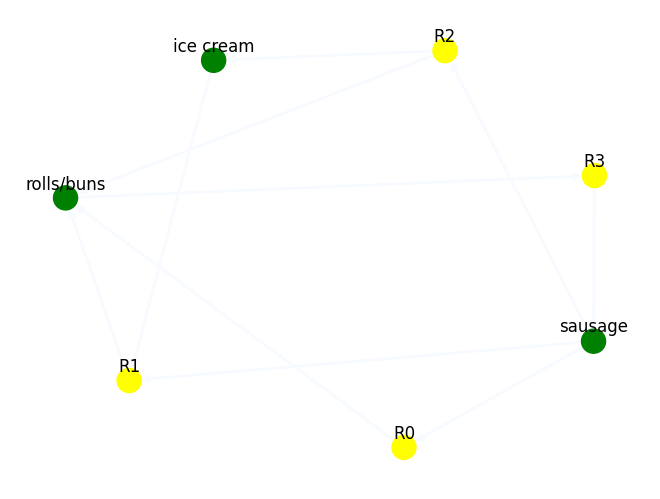

In [72]:
visualize_rules('ice cream',4,basket)

Items frequently bought together with chocolate
[frozenset({'whole milk'}), frozenset({'whole milk'}), frozenset({'whole milk', 'chocolate'}), frozenset({'pip fruit'}), frozenset({'pip fruit'}), frozenset({'chocolate', 'pip fruit'})]


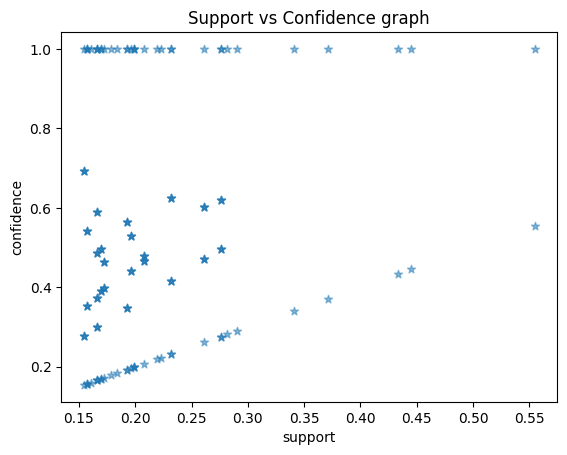

Visualization of Rules


C:\Users\aviji\AppData\Roaming\Python\Python310\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


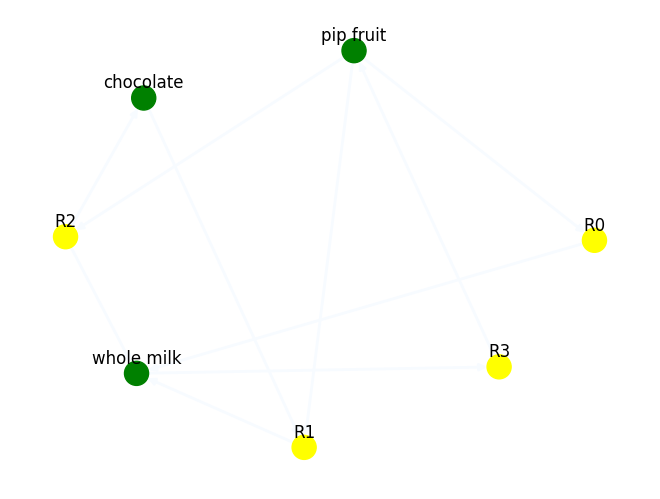

In [73]:
visualize_rules('chocolate',4,basket)

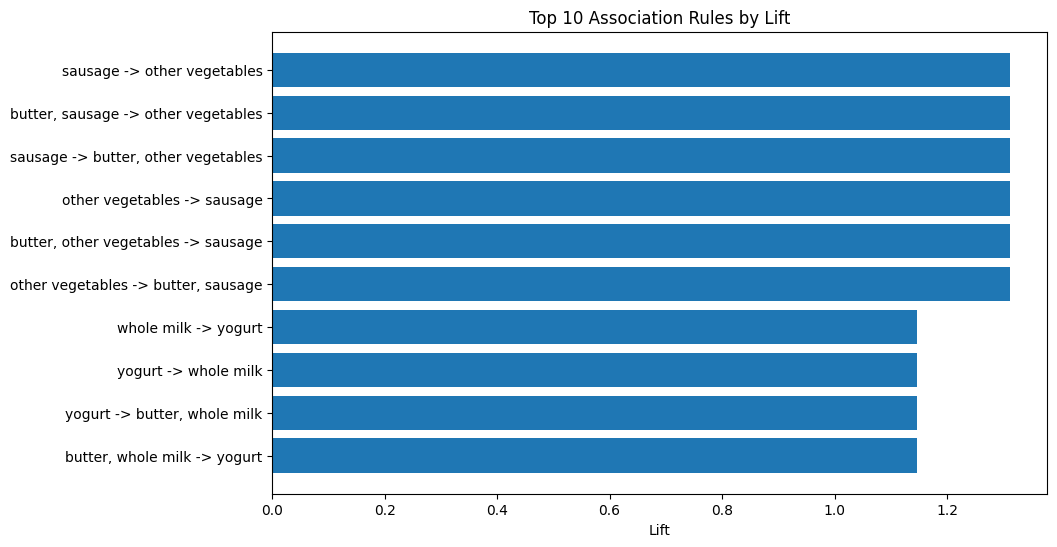

In [74]:
cat_df = basket.loc[basket['butter']==1]
frequent_itemsets = apriori(cat_df, min_support=0.15, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Convert frozensets to strings for labeling
top_rules['antecedents_str'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents_str'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_rules)), top_rules['lift'], tick_label=top_rules['antecedents_str'] + ' -> ' + top_rules['consequents_str'])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()

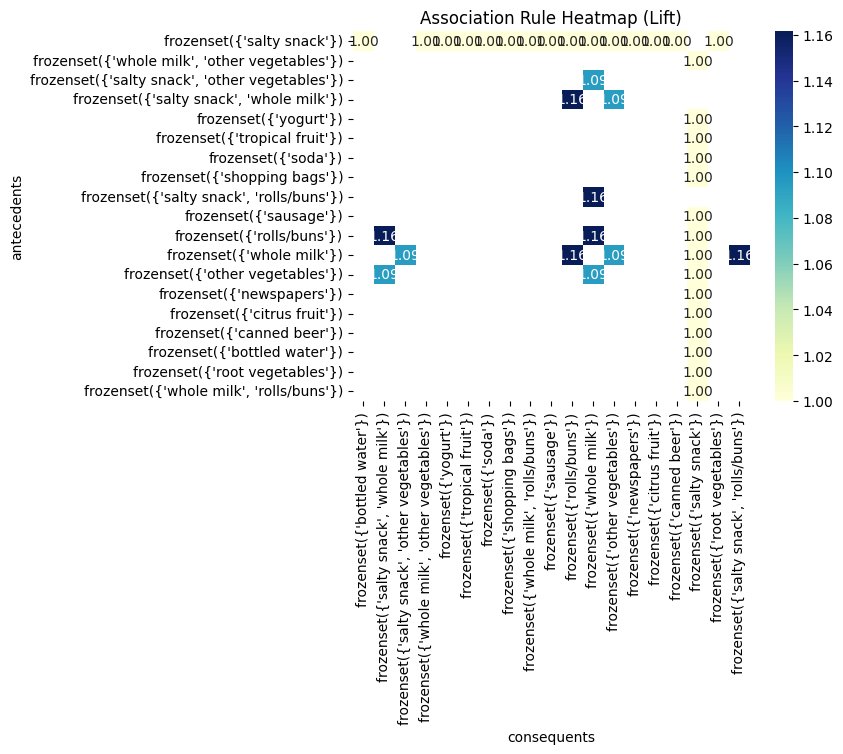

In [75]:
cat_df = basket.loc[basket['salty snack']==1]
frequent_itemsets = apriori(cat_df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Create a DataFrame for visualization
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Association Rule Heatmap (Lift)')
plt.show()

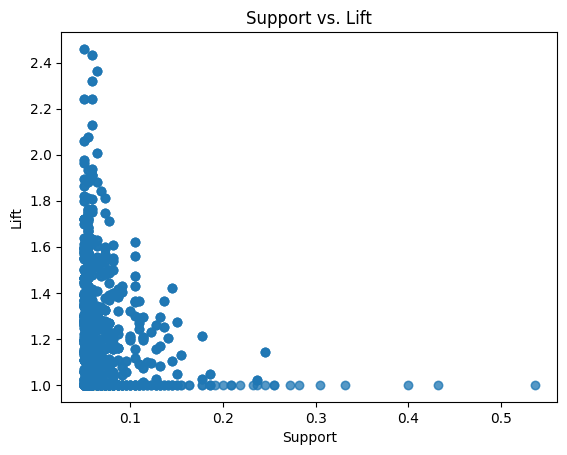

In [76]:
cat_df = basket.loc[basket['ice cream']==1]
frequent_itemsets = apriori(cat_df, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs. Lift')
plt.show()

In [78]:
data='D:\Pyn\online learning\INURAN_DATA\FSDS_September\TEST_WORK\msdasm work\Data Mining\Mall_Customers.xlsx'
df=pd.read_excel(data)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


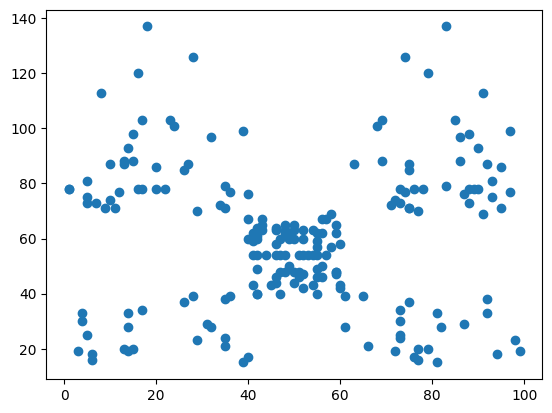

In [79]:
plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"])

In [81]:
from sklearn.cluster import KMeans

In [86]:
clustering=KMeans(n_clusters=5, random_state=0)
y_predicted=clustering.fit_predict(df[["Spending Score (1-100)","Annual Income (k$)"]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [83]:
from sklearn.cluster import KMeans


In [87]:
K = range(2,10)

for k in K:

  kmeanModel = KMeans(n_clusters=k)

  kmeanModel.fit(data)

  distortions.append(kmeanModel.inertia_)

ValueError: could not convert string to float: 'D:\\Pyn\\online learning\\INURAN_DATA\\FSDS_September\\TEST_WORK\\msdasm work\\Data Mining\\Mall_Customers.xlsx'

In [88]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [89]:
 import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [91]:
Univ = pd.read_csv(r"D:\Pyn\online learning\data_science_class\February_18 Hierarchical _ KMeans _ Theory _ Script\Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])
print(scaled_Univ_df)

[[ 0.41028362  0.6575195  -0.88986682  0.07026045 -0.33141256  0.82030265]
 [ 1.39925928  1.23521235 -0.73465749 -1.68625071  2.56038138 -0.64452351]
 [-0.06065717 -0.76045386  1.02438157 -0.93346022 -0.16712136 -1.65863393]
 [ 0.41028362 -0.02520842 -0.78639393 -0.18066972  0.29164871  0.14422904]
 [ 0.12771914  0.34241431 -0.32076595  0.07026045 -0.39084607  0.36958691]
 [ 0.69284809  0.6575195  -0.83813038 -0.68253005  0.33778044  0.93298158]
 [ 0.4573777   0.71003703 -0.47597528 -0.18066972  0.29695528  0.93298158]
 [-0.10775125 -0.13024348 -0.78639393 -0.18066972 -0.51381683  0.59494478]
 [ 1.25797704  0.76255456 -1.30375836 -0.43159988  0.85874344  1.15833946]
 [ 0.36318954 -0.07772595  0.24833493 -1.43532055  2.21481798  0.0315501 ]
 [ 1.06960072  0.92010716 -0.47597528 -0.68253005  0.52938275  0.48226584]
 [-0.06065717  0.44744937 -0.01034729 -0.43159988  0.04698077  0.25690797]
 [-0.10775125  0.23737924  0.14486204  0.07026045 -0.86787073  0.82030265]
 [-1.7466252  -2.02087462

In [93]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [94]:
!pip install scikit-learn
import sklearn.cluster as sc

wcss = []
for i in range(1,11):
    kmeans = sc.KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [95]:
import pandas as pd

In [96]:
Univ = pd.read_csv("your_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'your_data.csv'

In [97]:
# Standardization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])
print(scaled_Univ_df)

[[ 0.41028362  0.6575195  -0.88986682  0.07026045 -0.33141256  0.82030265]
 [ 1.39925928  1.23521235 -0.73465749 -1.68625071  2.56038138 -0.64452351]
 [-0.06065717 -0.76045386  1.02438157 -0.93346022 -0.16712136 -1.65863393]
 [ 0.41028362 -0.02520842 -0.78639393 -0.18066972  0.29164871  0.14422904]
 [ 0.12771914  0.34241431 -0.32076595  0.07026045 -0.39084607  0.36958691]
 [ 0.69284809  0.6575195  -0.83813038 -0.68253005  0.33778044  0.93298158]
 [ 0.4573777   0.71003703 -0.47597528 -0.18066972  0.29695528  0.93298158]
 [-0.10775125 -0.13024348 -0.78639393 -0.18066972 -0.51381683  0.59494478]
 [ 1.25797704  0.76255456 -1.30375836 -0.43159988  0.85874344  1.15833946]
 [ 0.36318954 -0.07772595  0.24833493 -1.43532055  2.21481798  0.0315501 ]
 [ 1.06960072  0.92010716 -0.47597528 -0.68253005  0.52938275  0.48226584]
 [-0.06065717  0.44744937 -0.01034729 -0.43159988  0.04698077  0.25690797]
 [-0.10775125  0.23737924  0.14486204  0.07026045 -0.86787073  0.82030265]
 [-1.7466252  -2.02087462

In [98]:
!pip install scikit-learn
import sklearn.cluster as sc

wcss = []
for i in range(1,11):
    kmeans = sc.KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [99]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [100]:
# Standardization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])
print(scaled_Univ_df)

[[ 0.41028362  0.6575195  -0.88986682  0.07026045 -0.33141256  0.82030265]
 [ 1.39925928  1.23521235 -0.73465749 -1.68625071  2.56038138 -0.64452351]
 [-0.06065717 -0.76045386  1.02438157 -0.93346022 -0.16712136 -1.65863393]
 [ 0.41028362 -0.02520842 -0.78639393 -0.18066972  0.29164871  0.14422904]
 [ 0.12771914  0.34241431 -0.32076595  0.07026045 -0.39084607  0.36958691]
 [ 0.69284809  0.6575195  -0.83813038 -0.68253005  0.33778044  0.93298158]
 [ 0.4573777   0.71003703 -0.47597528 -0.18066972  0.29695528  0.93298158]
 [-0.10775125 -0.13024348 -0.78639393 -0.18066972 -0.51381683  0.59494478]
 [ 1.25797704  0.76255456 -1.30375836 -0.43159988  0.85874344  1.15833946]
 [ 0.36318954 -0.07772595  0.24833493 -1.43532055  2.21481798  0.0315501 ]
 [ 1.06960072  0.92010716 -0.47597528 -0.68253005  0.52938275  0.48226584]
 [-0.06065717  0.44744937 -0.01034729 -0.43159988  0.04698077  0.25690797]
 [-0.10775125  0.23737924  0.14486204  0.07026045 -0.86787073  0.82030265]
 [-1.7466252  -2.02087462

In [101]:
 import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [102]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [103]:
wcss

[]

In [104]:
 import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [105]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])
print(scaled_Univ_df)

[[ 0.41028362  0.6575195  -0.88986682  0.07026045 -0.33141256  0.82030265]
 [ 1.39925928  1.23521235 -0.73465749 -1.68625071  2.56038138 -0.64452351]
 [-0.06065717 -0.76045386  1.02438157 -0.93346022 -0.16712136 -1.65863393]
 [ 0.41028362 -0.02520842 -0.78639393 -0.18066972  0.29164871  0.14422904]
 [ 0.12771914  0.34241431 -0.32076595  0.07026045 -0.39084607  0.36958691]
 [ 0.69284809  0.6575195  -0.83813038 -0.68253005  0.33778044  0.93298158]
 [ 0.4573777   0.71003703 -0.47597528 -0.18066972  0.29695528  0.93298158]
 [-0.10775125 -0.13024348 -0.78639393 -0.18066972 -0.51381683  0.59494478]
 [ 1.25797704  0.76255456 -1.30375836 -0.43159988  0.85874344  1.15833946]
 [ 0.36318954 -0.07772595  0.24833493 -1.43532055  2.21481798  0.0315501 ]
 [ 1.06960072  0.92010716 -0.47597528 -0.68253005  0.52938275  0.48226584]
 [-0.06065717  0.44744937 -0.01034729 -0.43159988  0.04698077  0.25690797]
 [-0.10775125  0.23737924  0.14486204  0.07026045 -0.86787073  0.82030265]
 [-1.7466252  -2.02087462

In [107]:
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [108]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [109]:
K = range(2,10)

for k in K:

  kmeanModel = KMeans(n_clusters=k)

  kmeanModel.fit(data)

  distortions.append(kmeanModel.inertia_)

ValueError: could not convert string to float: 'D:\\Pyn\\online learning\\INURAN_DATA\\FSDS_September\\TEST_WORK\\msdasm work\\Data Mining\\Mall_Customers.xlsx'

pip install threadpoolctl==3.1.0

In [110]:
!pip install threadpoolctl

In [111]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [112]:
pip install --upgrade threadpoolctl

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [113]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [114]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 1.4 MB/s eta 0:00:08
   ---------------------------------------- 0.0/10.6 MB 1.4 MB/s eta 0:00:08
   ---------------------------------------- 0.1/10.6 MB 563.7 kB/s eta 0:00:19
   ---------------------------------------- 0.1/10.6 MB 476.3 kB/s eta 0:00:23
   ---------------------------------------- 0.1/10.6 MB 514.3 kB/s eta 0:00:21
    --------------------------------------- 0.1/10.6 MB 532.5 kB/s eta 0:00:20
    --------------------------------------- 0.2/10.6 MB 510.2 kB/s eta 0:00:21
    --------------------------------------- 0.2/10.6 MB 535.8 kB/s eta 0:00:20
    --------------------------------------- 0.2/10.6 MB 529.7 kB/s eta 0:00:20
    ------------

In [116]:
import warnings
warnings.filterwarnings("ignore")

In [117]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

In [118]:
cross_val_rfc = cross_val_score(estimator=RandomForestClassifier(n_estimators=100), X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy of Random Forest: ",round(cross_val_rfc.mean() * 100 , 2),"%")

NameError: name 'cross_val_score' is not defined

In [119]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) <== added this line; not sure, if ok!
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
y_pred_rfc = random_forest_classifier.predict(X_test)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

print("\nConfusion Matrix")
cm_random_forest_classifier = confusion_matrix(y_test,y_pred_rfc)
print(cm_random_forest_classifier, end="\n\n")

print("\nCalculating the accuracy from the confusion matrix for Random Forest")
numerator = cm_random_forest_classifier[0][0] + cm_random_forest_classifier[1][1]
denominator = sum(cm_random_forest_classifier[0]) + sum(cm_random_forest_classifier[1])
acc_rfc = (numerator/denominator) * 100
print("Accuracy of Random Forest: ", round(acc_rfc,2),"%")

cross_val_rfc = cross_val_score(estimator=RandomForestClassifier(), X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy of Random Forest: ",round(cross_val_rfc.mean() * 100 , 2),"%")

SyntaxError: invalid syntax (3232231237.py, line 2)

In [120]:
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [123]:
kmeans = KMeans(n_clusters=4,random_state=12)
kmeans.fit(scaled_Univ_df)
wcss.append(kmeans.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

In [124]:
python --version

NameError: name 'python' is not defined

In [126]:
python -v

NameError: name 'python' is not defined

In [127]:
python3 --version

NameError: name 'python3' is not defined

In [128]:
python version

SyntaxError: invalid syntax (1241365062.py, line 1)

In [131]:
!python3 --v

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [133]:
!pip install --upgrade pip setuptools virtualenv

   ---------------------------------------- 0.0/819.3 kB ? eta -:--:--
   ---- ----------------------------------- 92.2/819.3 kB 2.6 MB/s eta 0:00:01
   ------- -------------------------------- 163.8/819.3 kB 1.9 MB/s eta 0:00:01
   ----------------- ---------------------- 358.4/819.3 kB 2.8 MB/s eta 0:00:01
   ---------------------------- ----------- 583.7/819.3 kB 3.3 MB/s eta 0:00:01
   ---------------------------------- ----- 706.6/819.3 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 819.3/819.3 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   - -------------------------------------- 0.2/3.8 MB 5.3 MB/s eta 0:00:01
   ---- ----------------------------------- 0.4/3.8 MB 5.0 MB/s eta 0:00:01
   ------ --------------------------------- 0.6/3.8 MB 5.0 MB/s eta 0:00:01
   -------- ------------------------------- 0.8/3.8 MB 4.8 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/3.8 MB 4.6 MB/s eta 0:00:01
 

In [134]:
python -v

NameError: name 'python' is not defined

In [135]:
python

NameError: name 'python' is not defined

In [136]:
print('Avijit')

Avijit


In [1]:
print("avijit")

avijit


In [2]:
 import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
Univ = pd.read_csv(r"D:\Pyn\online learning\data_science_class\February_18 Hierarchical _ KMeans _ Theory _ Script\Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [3]:
print("av")

av


In [4]:
# Standardization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])
print(scaled_Univ_df)

[[ 0.41028362  0.6575195  -0.88986682  0.07026045 -0.33141256  0.82030265]
 [ 1.39925928  1.23521235 -0.73465749 -1.68625071  2.56038138 -0.64452351]
 [-0.06065717 -0.76045386  1.02438157 -0.93346022 -0.16712136 -1.65863393]
 [ 0.41028362 -0.02520842 -0.78639393 -0.18066972  0.29164871  0.14422904]
 [ 0.12771914  0.34241431 -0.32076595  0.07026045 -0.39084607  0.36958691]
 [ 0.69284809  0.6575195  -0.83813038 -0.68253005  0.33778044  0.93298158]
 [ 0.4573777   0.71003703 -0.47597528 -0.18066972  0.29695528  0.93298158]
 [-0.10775125 -0.13024348 -0.78639393 -0.18066972 -0.51381683  0.59494478]
 [ 1.25797704  0.76255456 -1.30375836 -0.43159988  0.85874344  1.15833946]
 [ 0.36318954 -0.07772595  0.24833493 -1.43532055  2.21481798  0.0315501 ]
 [ 1.06960072  0.92010716 -0.47597528 -0.68253005  0.52938275  0.48226584]
 [-0.06065717  0.44744937 -0.01034729 -0.43159988  0.04698077  0.25690797]
 [-0.10775125  0.23737924  0.14486204  0.07026045 -0.86787073  0.82030265]
 [-1.7466252  -2.02087462

In [5]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

In [6]:
wcss

[149.99999999999997,
 64.14528395010268,
 47.47264116827912,
 40.027426645647346,
 31.571015429354773,
 27.99099795080374,
 25.037828828984292,
 17.69864042649729,
 14.745471304677832,
 12.052878077473405]

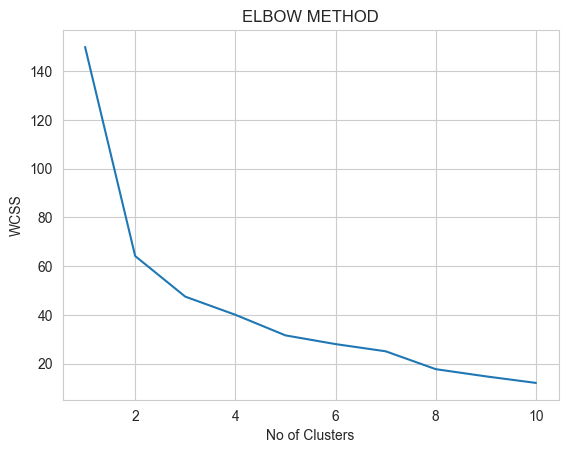

In [7]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(n_clusters=3, random_state=12)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=3, random_state=12)

In [9]:
clusters_new.labels_

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0,
       2, 1, 0])

In [10]:
Univ['clusterid_new'] = clusters_new.labels_

In [12]:
clusters_new.cluster_centers_

array([[ 0.58394303,  0.50324925, -0.58268169, -0.49433243,  0.54203448,
         0.51043558],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.32438402, -0.02520842,  0.58979545,  0.27100458, -0.74763108,
        -0.28395092]])

In [13]:
Univ.groupby('clusterid_new').agg(['mean'])

TypeError: Could not convert BrownCalTechColumbiaCornellDartmouthDukeGeorgetownHarvardJohnsHopkinsMITNorthwesternPrincetonStanfordUChicagoUPennYale to numeric

In [1]:
print("Avijit Biswas")

Avijit Biswas


In [2]:
 import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [3]:
Univ = pd.read_csv(r"D:\Pyn\online learning\data_science_class\February_18 Hierarchical _ KMeans _ Theory _ Script\Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
# Standardization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])
print(scaled_Univ_df)

[[ 0.41028362  0.6575195  -0.88986682  0.07026045 -0.33141256  0.82030265]
 [ 1.39925928  1.23521235 -0.73465749 -1.68625071  2.56038138 -0.64452351]
 [-0.06065717 -0.76045386  1.02438157 -0.93346022 -0.16712136 -1.65863393]
 [ 0.41028362 -0.02520842 -0.78639393 -0.18066972  0.29164871  0.14422904]
 [ 0.12771914  0.34241431 -0.32076595  0.07026045 -0.39084607  0.36958691]
 [ 0.69284809  0.6575195  -0.83813038 -0.68253005  0.33778044  0.93298158]
 [ 0.4573777   0.71003703 -0.47597528 -0.18066972  0.29695528  0.93298158]
 [-0.10775125 -0.13024348 -0.78639393 -0.18066972 -0.51381683  0.59494478]
 [ 1.25797704  0.76255456 -1.30375836 -0.43159988  0.85874344  1.15833946]
 [ 0.36318954 -0.07772595  0.24833493 -1.43532055  2.21481798  0.0315501 ]
 [ 1.06960072  0.92010716 -0.47597528 -0.68253005  0.52938275  0.48226584]
 [-0.06065717  0.44744937 -0.01034729 -0.43159988  0.04698077  0.25690797]
 [-0.10775125  0.23737924  0.14486204  0.07026045 -0.86787073  0.82030265]
 [-1.7466252  -2.02087462

In [5]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

In [6]:
wcss

[149.99999999999997,
 64.14528395010268,
 47.47264116827912,
 40.027426645647346,
 31.571015429354773,
 27.99099795080374,
 25.037828828984292,
 17.69864042649729,
 14.745471304677832,
 12.052878077473405]

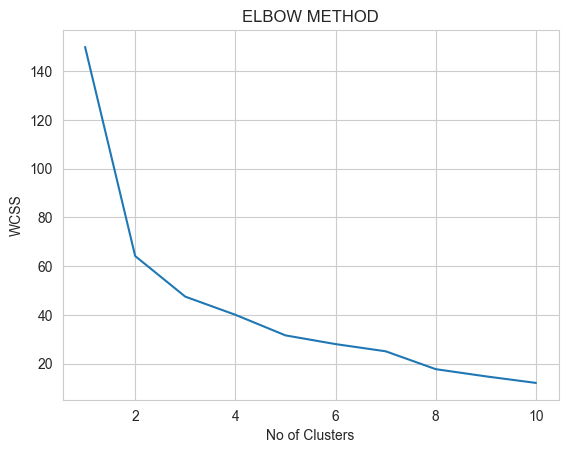

In [7]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(n_clusters=3, random_state=12)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=3, random_state=12)

In [9]:
clusters_new.labels_

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0,
       2, 1, 0])

In [10]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_

In [11]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [12]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.58394303,  0.50324925, -0.58268169, -0.49433243,  0.54203448,
         0.51043558],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.32438402, -0.02520842,  0.58979545,  0.27100458, -0.74763108,
        -0.28395092]])

In [13]:
Univ.groupby('clusterid_new').agg(['mean'])

TypeError: Could not convert BrownCalTechColumbiaCornellDartmouthDukeGeorgetownHarvardJohnsHopkinsMITNorthwesternPrincetonStanfordUChicagoUPennYale to numeric

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)

In [16]:
df=pd.read_excel("D:\Pyn\online learning\INURAN_DATA\FSDS_September\TEST_WORK\msdasm work\Data Mining\Mall_Customers.xlsx")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


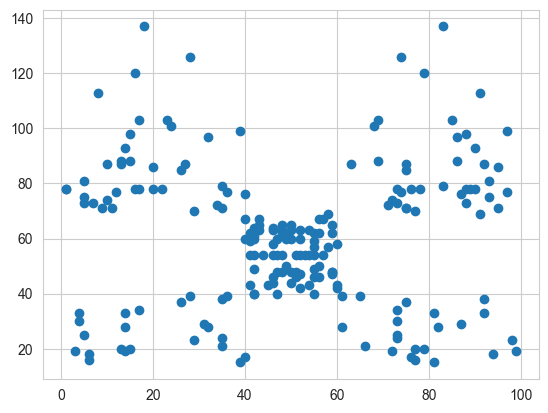

In [17]:
plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"])

In [18]:
clustering=KMeans(n_clusters=5)

y_predicted=clustering.fit_predict(df[["Spending Score (1-100)","Annual Income (k$)"]])

In [19]:
df["cluster"]=y_predicted
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


Text(0, 0.5, 'Annual Income')

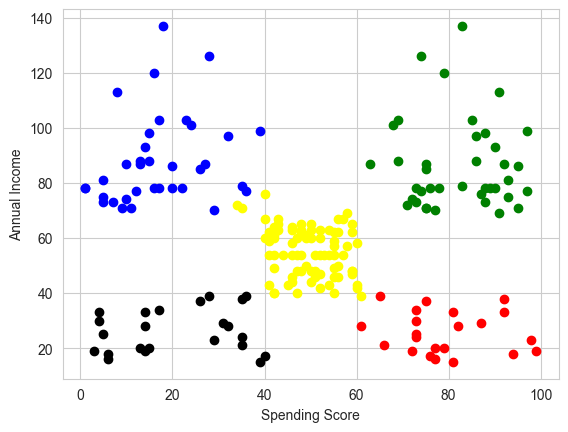

In [20]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

plt.scatter(df1["Spending Score (1-100)"],df1["Annual Income (k$)"],color='green')
plt.scatter(df2["Spending Score (1-100)"],df2["Annual Income (k$)"],color='blue')
plt.scatter(df3["Spending Score (1-100)"],df3["Annual Income (k$)"],color='red')
plt.scatter(df4["Spending Score (1-100)"],df4["Annual Income (k$)"],color='yellow')
plt.scatter(df5["Spending Score (1-100)"],df5["Annual Income (k$)"],color='black')

plt.xlabel('Spending Score')
plt.ylabel('Annual Income')

In [21]:
scaler=MinMaxScaler()

df['Spending Score (1-100)']=scaler.fit_transform(df[['Spending Score (1-100)']])
df["Annual Income (k$)"]=scaler.fit_transform(df[['Annual Income (k$)']])

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,2
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,2
4,5,Female,31,0.016393,0.397959,4


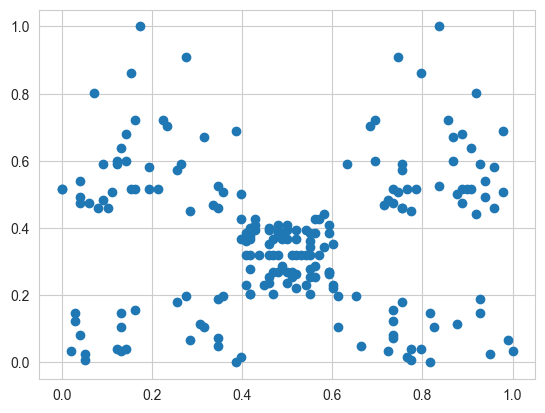

In [22]:
plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"])

In [23]:
km=KMeans(n_clusters=5)
y_predicted=km.fit_predict(df[['Spending Score (1-100)',"Annual Income (k$)"]])
df.cluster=y_predicted
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,3
1,2,Male,21,0.000000,0.816327,4
2,3,Female,20,0.008197,0.051020,3
3,4,Female,23,0.008197,0.775510,4
4,5,Female,31,0.016393,0.397959,3


In [24]:
km.cluster_centers_

array([[0.49533888, 0.32695811],
       [0.82783883, 0.58638083],
       [0.16921769, 0.59631148],
       [0.19619666, 0.08792846],
       [0.79962894, 0.08792846]])

In [25]:
centres  = pd.DataFrame(km.cluster_centers_)

In [26]:
centres[0]


0    0.495339
1    0.827839
2    0.169218
3    0.196197
4    0.799629
Name: 0, dtype: float64

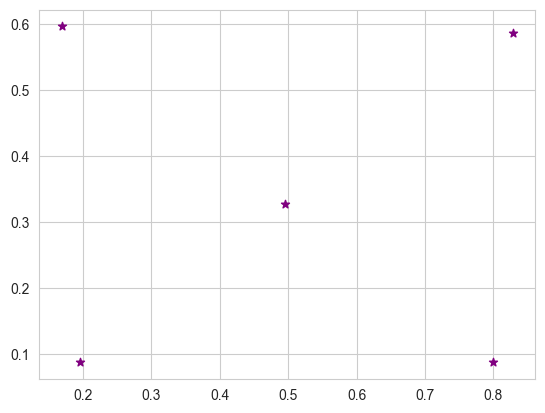

In [27]:
plt.scatter(centres[0],centres[1],color='purple',marker='*')

Text(0, 0.5, 'Annual Income')

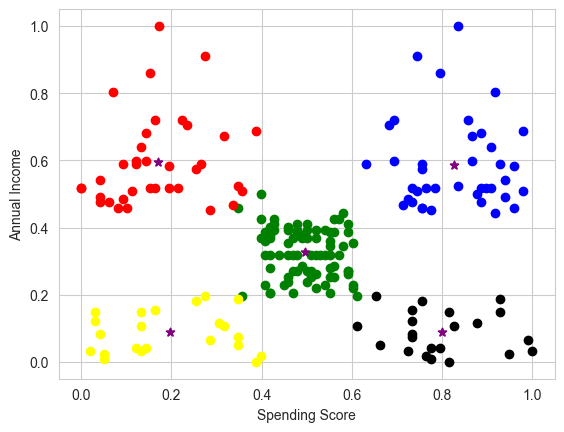

In [28]:
plt.scatter(centres[0], centres[1], color='purple', marker='*')
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]

plt.scatter(df1["Spending Score (1-100)"], df1["Annual Income (k$)"], color='green')
plt.scatter(df2["Spending Score (1-100)"], df2["Annual Income (k$)"], color='blue')
plt.scatter(df3["Spending Score (1-100)"], df3["Annual Income (k$)"], color='red')
plt.scatter(df4["Spending Score (1-100)"], df4["Annual Income (k$)"], color='yellow')
plt.scatter(df5["Spending Score (1-100)"], df5["Annual Income (k$)"], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*')

plt.xlabel('Spending Score')
plt.ylabel('Annual Income')

In [29]:
k_rng=range(1,11)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Spending Score (1-100)',"Annual Income (k$)"]])
    sse.append(km.inertia_)

ValueError: x and y must have same first dimension, but have shapes (10,) and (11,)

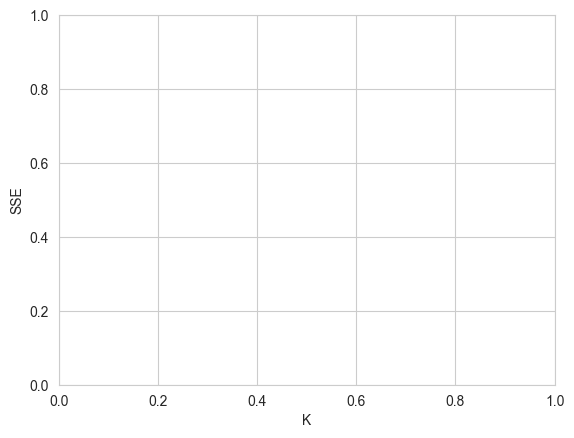

In [30]:
sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('SSE')

plt.plot(k_rng, sse)
plt.scatter(k_rng, sse)